# Import libraries

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action = "ignore") 

# Exploratory Data Analysis

## Dataset Define

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Description of dataset

In [6]:
diabetes_data.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
diabetes_data["Outcome"].value_counts()*100/len(diabetes_data)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [8]:
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Histogram Plot

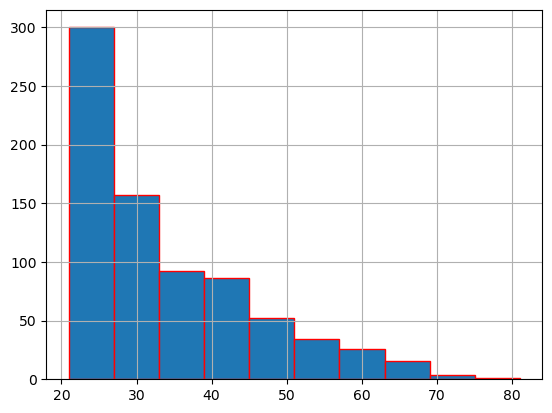

In [9]:
diabetes_data["Age"].hist(edgecolor = "Red");


In [10]:
print("Max Age: " + str(diabetes_data["Age"].max()) + " Min Age: " + str(diabetes_data["Age"].min()))

Max Age: 81 Min Age: 21


## Density Graph

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

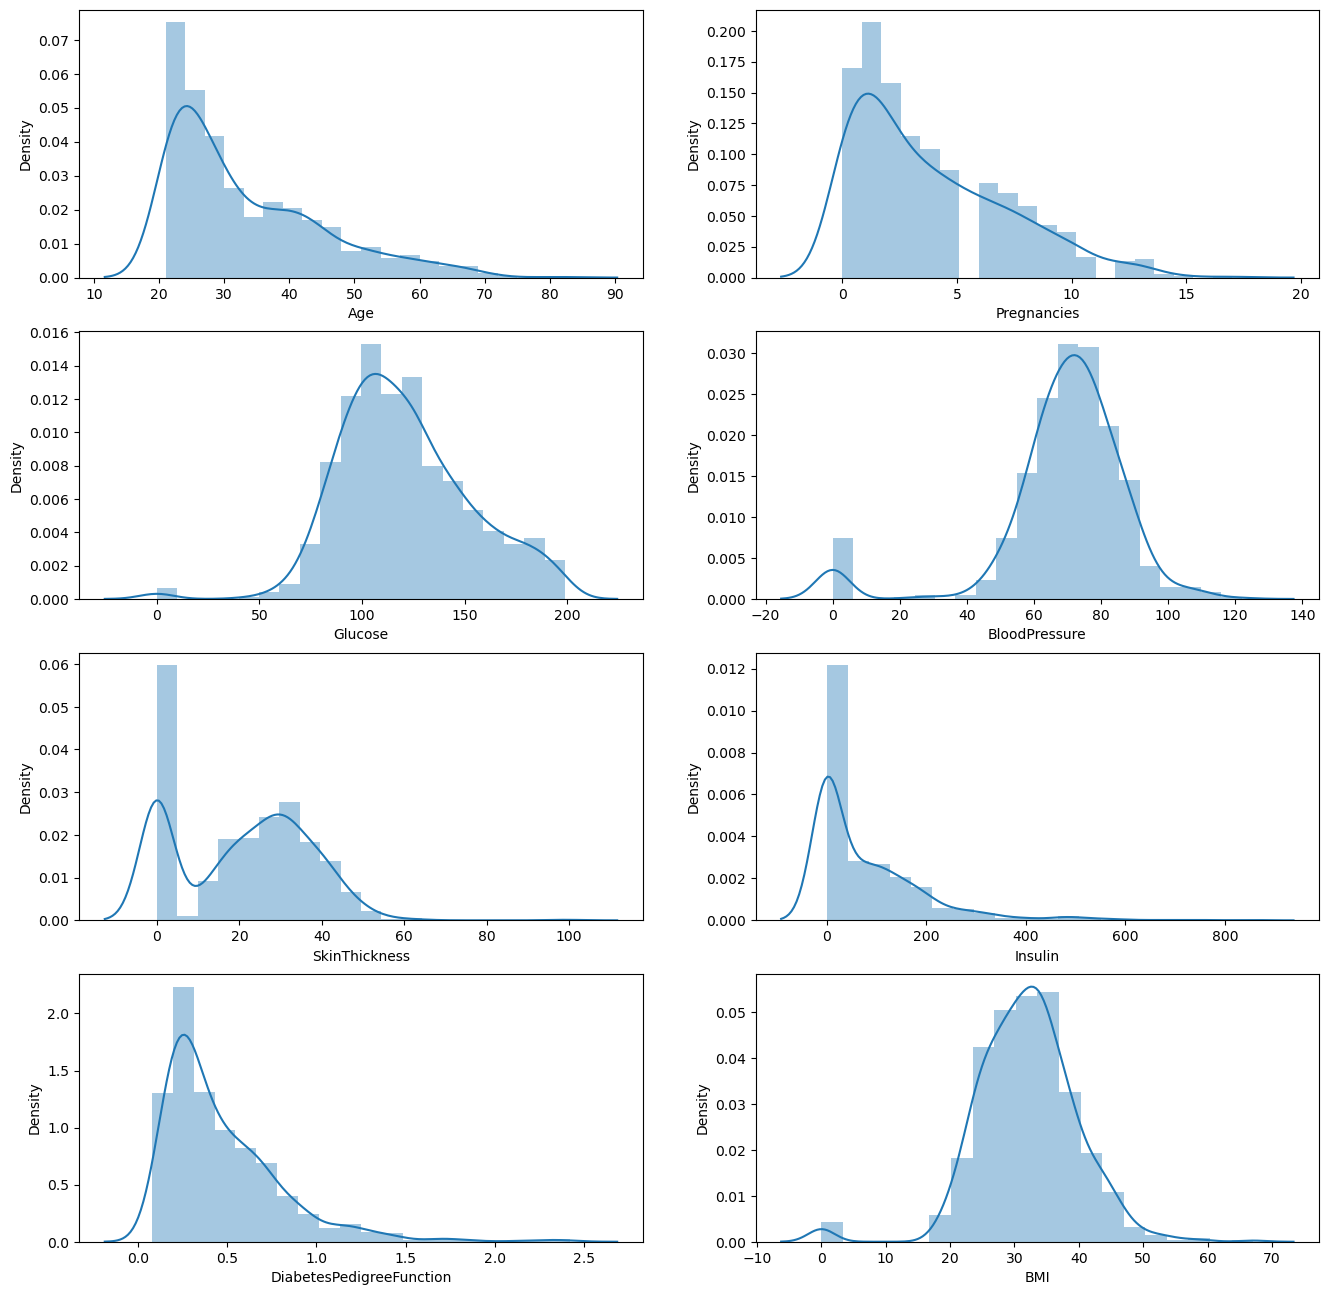

In [11]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetes_data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetes_data.BMI, bins = 20, ax=ax[3,1])
sns.distplot(diabetes_data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetes_data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetes_data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 

In [12]:
diabetes_data.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
diabetes_data.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [14]:
diabetes_data.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [15]:
diabetes_data.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [16]:
diabetes_data.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [17]:
diabetes_data.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [18]:
diabetes_data.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [19]:
diabetes_data.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


## Distribution of the outcome variable

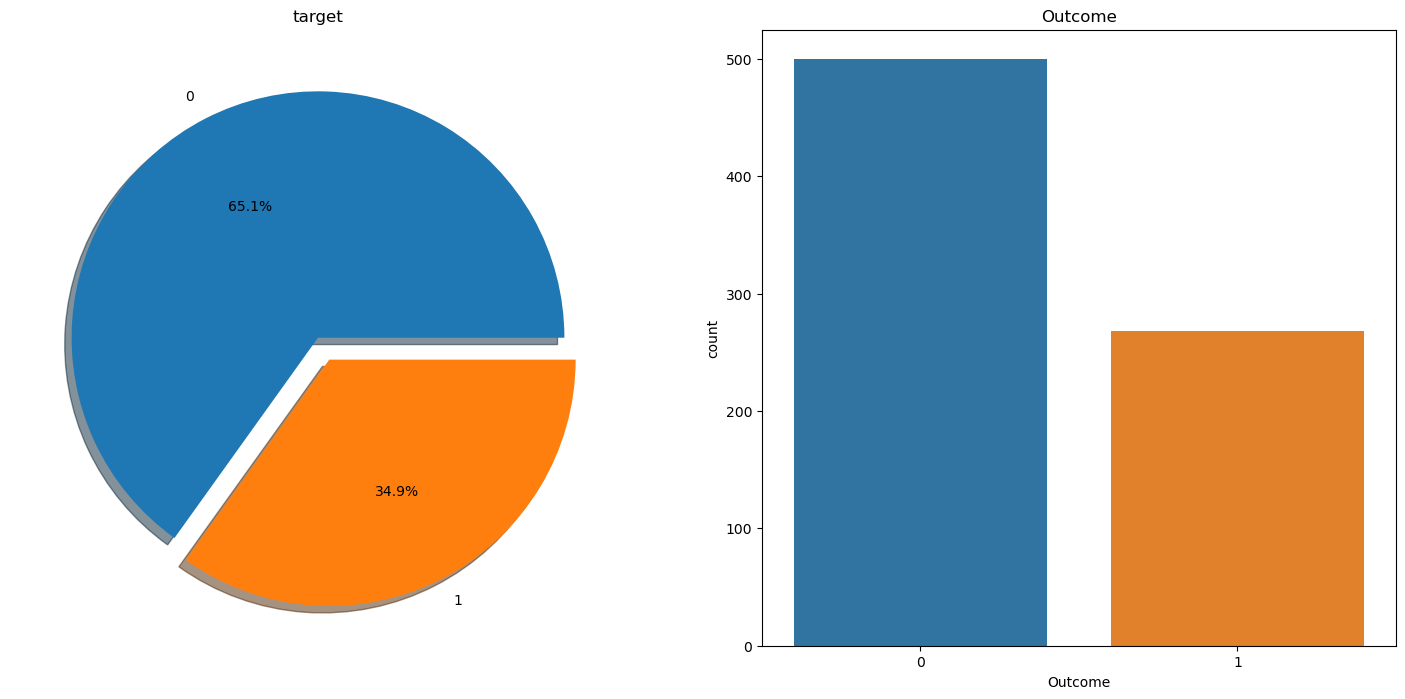

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
diabetes_data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=diabetes_data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

## Correlation Matrix

In [21]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


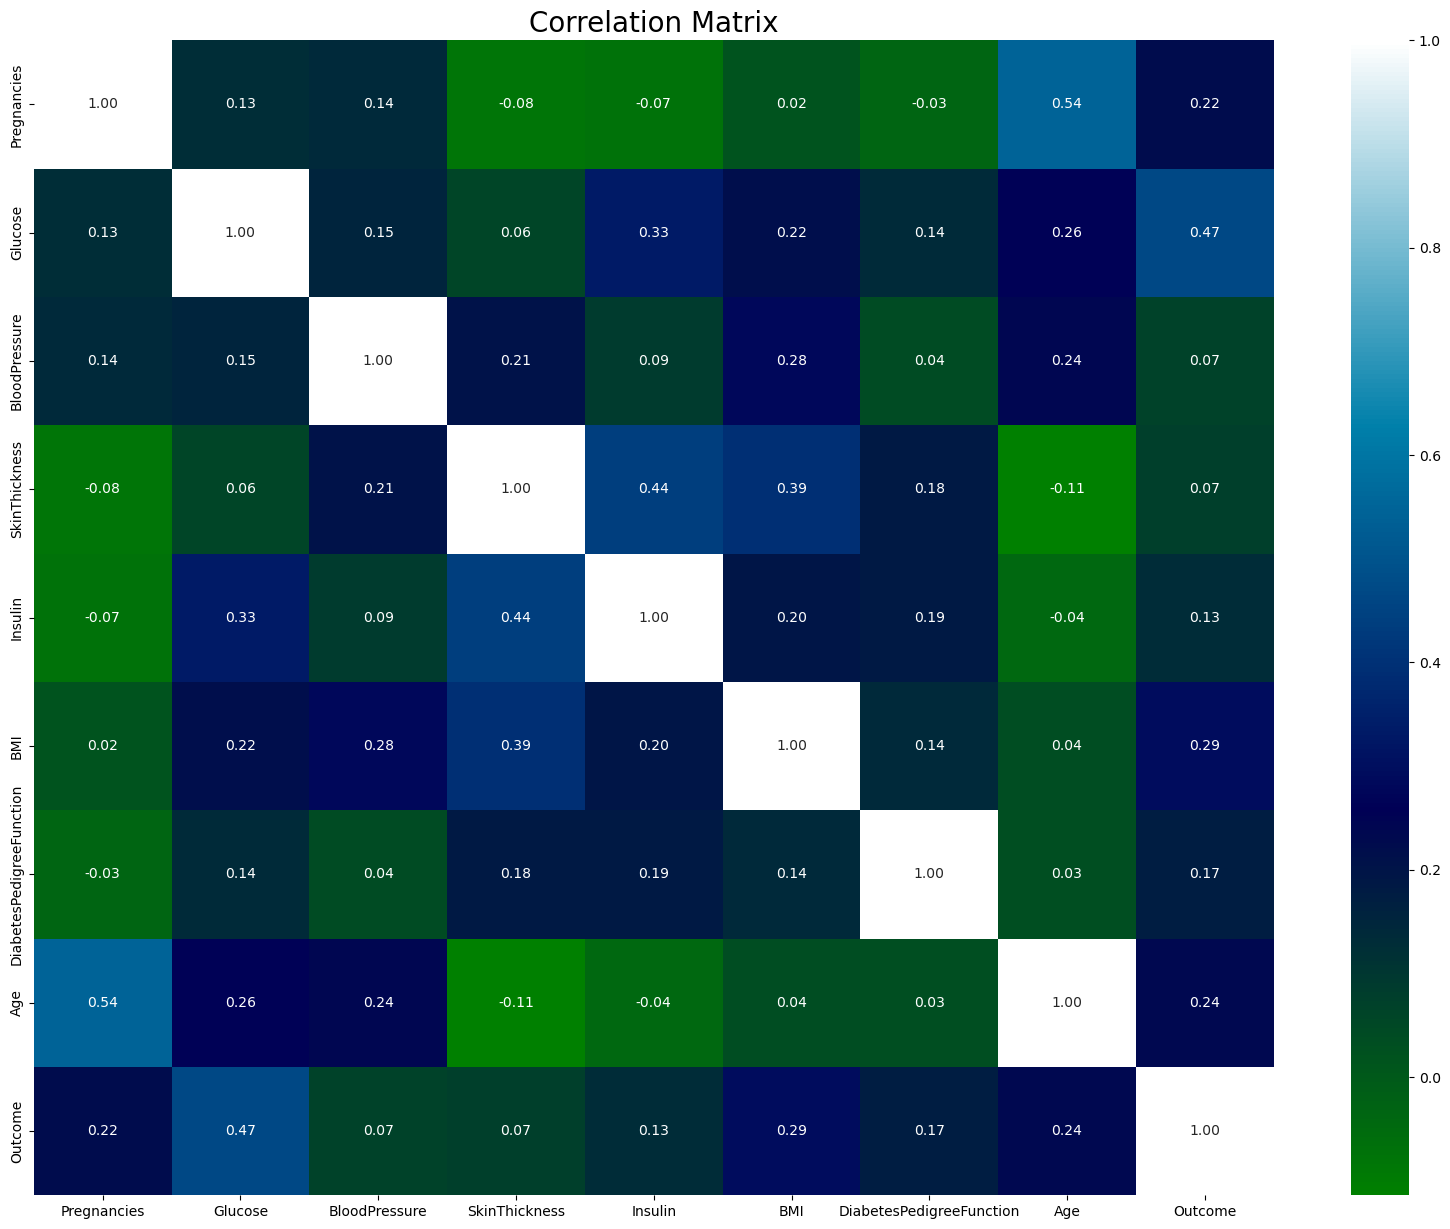

In [22]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diabetes_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "ocean" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Data Preprocessing

In [23]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

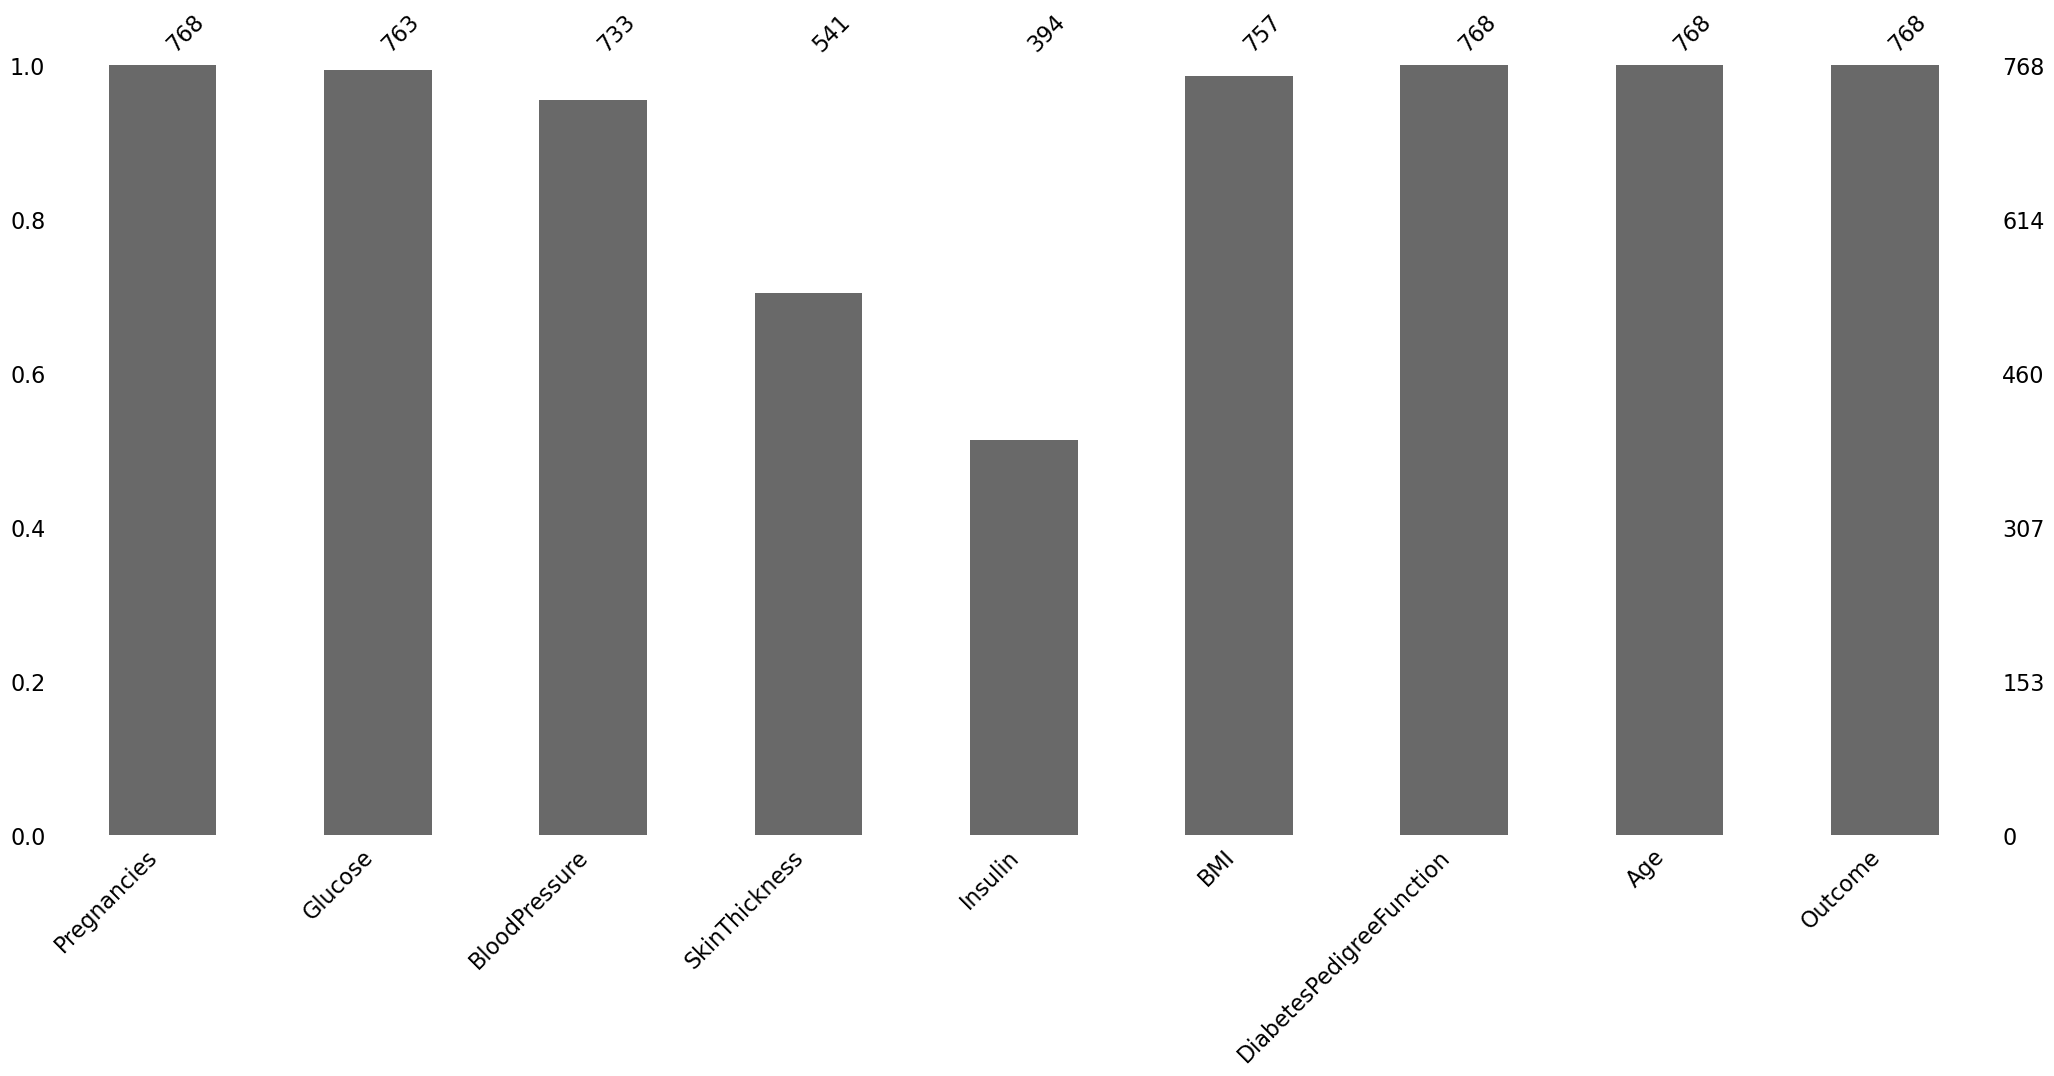

In [26]:
import missingno as msno
msno.bar(diabetes_data);

In [27]:
def median_target(var):   
    temp = diabetes_data[diabetes_data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [28]:
columns = diabetes_data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data[i].isnull()), i] = median_target(i)[i][0]
    diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data[i].isnull()), i] = median_target(i)[i][1]

In [29]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
for feature in diabetes_data:
    
    Q1 = diabetes_data[feature].quantile(0.25)
    Q3 = diabetes_data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabetes_data[(diabetes_data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


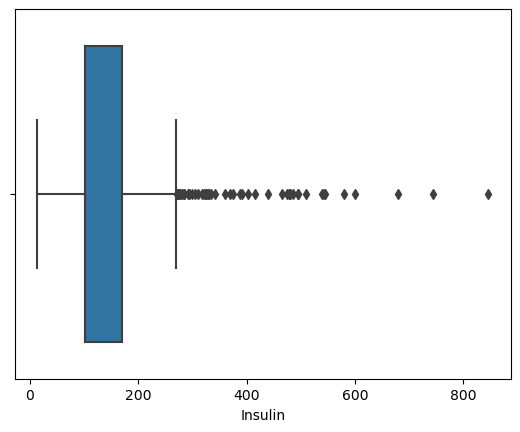

In [32]:
import seaborn as sns
sns.boxplot(x = diabetes_data["Insulin"]);

In [33]:
Q1 = diabetes_data.Insulin.quantile(0.25)
Q3 = diabetes_data.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabetes_data.loc[diabetes_data["Insulin"] > upper,"Insulin"] = upper

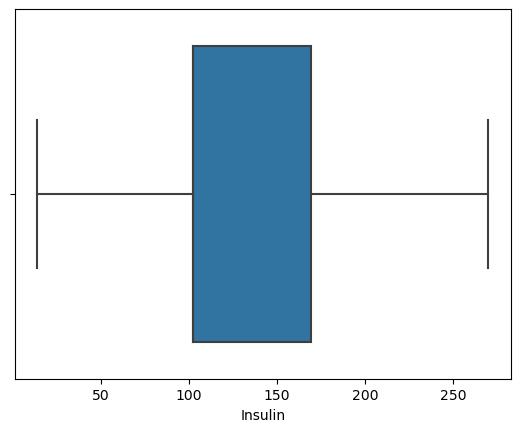

In [34]:
import seaborn as sns
sns.boxplot(x = diabetes_data["Insulin"]);

In [35]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes_data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [36]:
diabetes_data_scores = lof.negative_outlier_factor_
np.sort(diabetes_data_scores)[0:40]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248,
       -1.46976606, -1.46794707, -1.46721527, -1.46301346, -1.45360062,
       -1.45302122, -1.44375649, -1.44010321, -1.4399884 , -1.43991104])

In [37]:
threshold = np.sort(diabetes_data_scores)[7]
threshold

-1.740031580305444

In [38]:
outlier = diabetes_data_scores > threshold
diabetes_data = diabetes_data[outlier]

In [39]:
diabetes_data.shape

(760, 9)

# Data Featuring

In [40]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
diabetes_data["NewBMI"] = NewBMI
diabetes_data.loc[diabetes_data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes_data.loc[(diabetes_data["BMI"] > 18.5) & (diabetes_data["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes_data.loc[(diabetes_data["BMI"] > 24.9) & (diabetes_data["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes_data.loc[(diabetes_data["BMI"] > 29.9) & (diabetes_data["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes_data.loc[(diabetes_data["BMI"] > 34.9) & (diabetes_data["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes_data.loc[diabetes_data["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [41]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [42]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [43]:
diabetes_data = diabetes_data.assign(NewInsulinScore=diabetes_data.apply(set_insulin, axis=1))
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [44]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
diabetes_data["NewGlucose"] = NewGlucose
diabetes_data.loc[diabetes_data["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes_data.loc[(diabetes_data["Glucose"] > 70) & (diabetes_data["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes_data.loc[(diabetes_data["Glucose"] > 99) & (diabetes_data["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes_data.loc[diabetes_data["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [45]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [46]:
diabetes_data = pd.get_dummies(diabetes_data, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [47]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [48]:
categorical_diabetes_data = diabetes_data[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [49]:
categorical_diabetes_data.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [50]:
y = diabetes_data["Outcome"]
X = diabetes_data.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [51]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [52]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [53]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [54]:
X = pd.concat([X,categorical_diabetes_data], axis = 1)

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,0,0,1,0,0,0,0,0,0,1


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Model Implementation

# Data splitting

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Random Forest Model

In [58]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### Model fit

In [59]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = rf_classifier.predict(X_test)

### Obtained accuracy of the model

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8618421052631579


### Classification Report

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.85      0.81        53

    accuracy                           0.86       152
   macro avg       0.85      0.86      0.85       152
weighted avg       0.87      0.86      0.86       152



### Confusion Matrix 

Confusion Matrix:
 [[86 13]
 [ 8 45]]


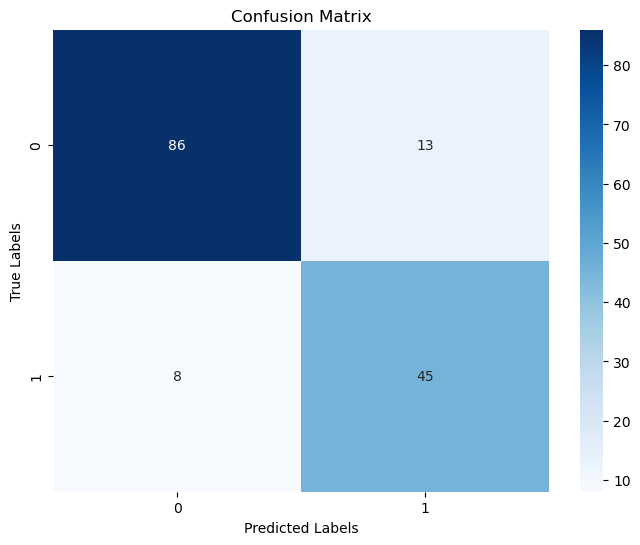

In [63]:
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mtx)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Logistic Regression Model 

### Model Fitting

In [64]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

### Classification Report 

In [65]:
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:\n", classification_rep_logreg)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        99
           1       0.74      0.79      0.76        53

    accuracy                           0.83       152
   macro avg       0.81      0.82      0.81       152
weighted avg       0.83      0.83      0.83       152



### Confusion Matrix 

Logistic Regression Confusion Matrix:
 [[84 15]
 [11 42]]


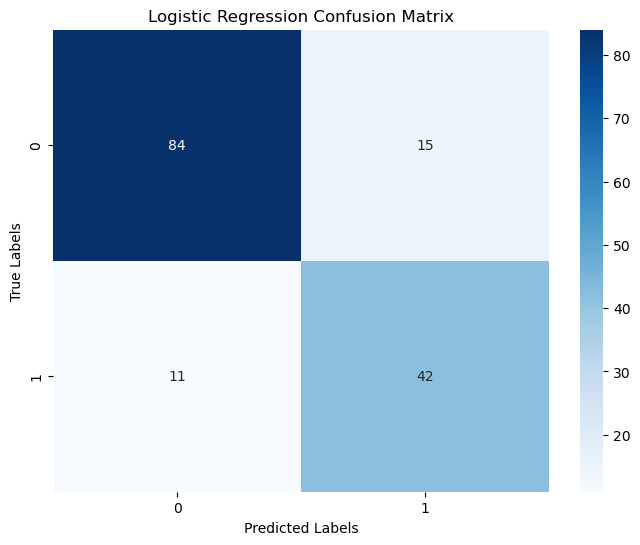

In [66]:
confusion_mtx_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:\n", confusion_mtx_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## SVM Model

### Model Fitting 

In [67]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

### Classification Report 

In [68]:
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", classification_rep_svm)


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        99
           1       0.75      0.74      0.74        53

    accuracy                           0.82       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.82      0.82      0.82       152



### Confusion Matrix 

SVM Confusion Matrix:
 [[86 13]
 [14 39]]


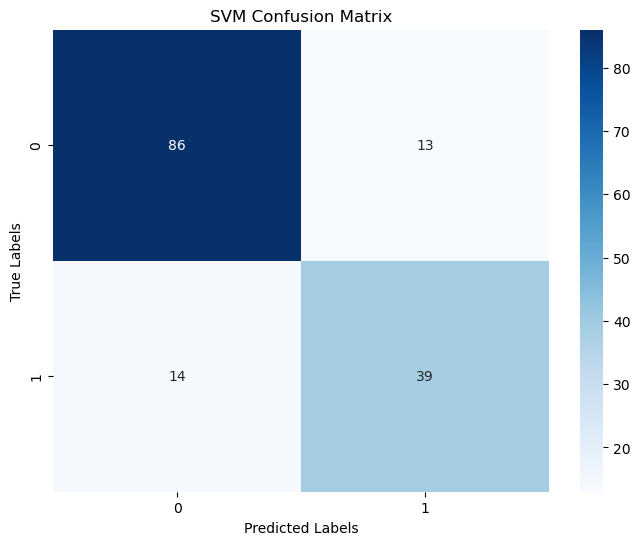

In [69]:
confusion_mtx_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", confusion_mtx_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
